Multilayer Perceptron(MLP) on Iris Dataset

In [2]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#Load datasets
df = pd.read_csv("bmi.csv")
X = df[["Age", "Height", "Weight", "Bmi"]].values
Y = df["BmiClass"].values
print(df.head())

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2


In [ ]:
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

print("Class labels: ", le.classes_) #Labels
print("Encoded y: ", Y_encoded[:5]) #Numeric targets

Class labels:  ['Normal Weight' 'Obese Class 1' 'Obese Class 2' 'Obese Class 3'
 'Overweight' 'Underweight']
Encoded y:  [1 4 1 5 2]


In [ ]:
#Converting BMI data to a pandas DataFrame
bmi_df = pd.DataFrame(X, columns=["Age", "Height", "Weight", "Bmi"])

#Adding the target varibale in the DataFrame
bmi_df['target'] = Y_encoded

#display first 5 rows
display(bmi_df.head())

,Age,Height,Weight,Bmi,target
0,61.0,1.85,109.30,31.935720,1
1,60.0,1.71,79.02,27.023700,4
2,60.0,1.55,74.70,31.092612,1
3,60.0,1.46,35.90,16.841809,5
4,60.0,1.58,97.10,38.896010,2


In [15]:
bmi_df.describe()

,Age,Height,Weight,Bmi,target
count,741.000000,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427,1.970310
std,11.655466,0.085974,32.254547,9.223191,2.005852
min,15.000000,1.460000,25.900000,12.150497,0.000000
25%,22.000000,1.670000,63.000000,22.129740,0.000000
50%,29.000000,1.721000,72.900000,24.132412,2.000000
75%,40.000000,1.751000,83.300000,27.249306,4.000000
max,61.000000,2.070000,270.000000,66.301350,5.000000


In [17]:
x = bmi_df.drop('target', axis=1)
y = bmi_df['target']
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     741 non-null    float64
 1   Height  741 non-null    float64
 2   Weight  741 non-null    float64
 3   Bmi     741 non-null    float64
 4   target  741 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.1 KB


In [19]:
#Prepocessor
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_encoded = to_categorical(y)
x_scaled.shape, y_encoded.shape

((741, 4), (741, 6))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((592, 4), (149, 4), (592, 6), (149, 6))

In [37]:
#Building MLP Model
model = Sequential([Input(shape=(4,)), Dense(32, activation='relu'), Dense(16, activation='relu'), Dense(6, activation='softmax')])

#Compilation of the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Training of the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[es], verbose=0)

#Evaluation of the model's accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 98.66%


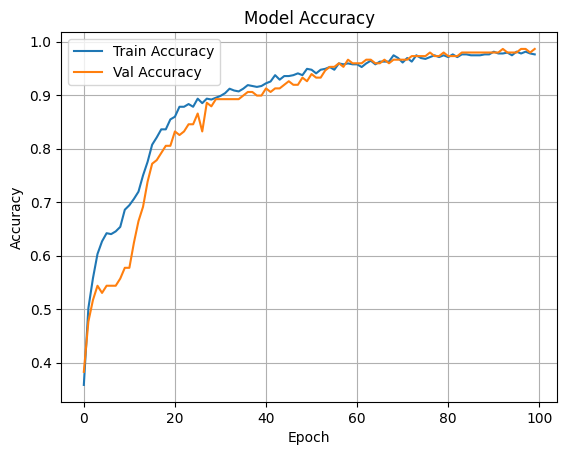

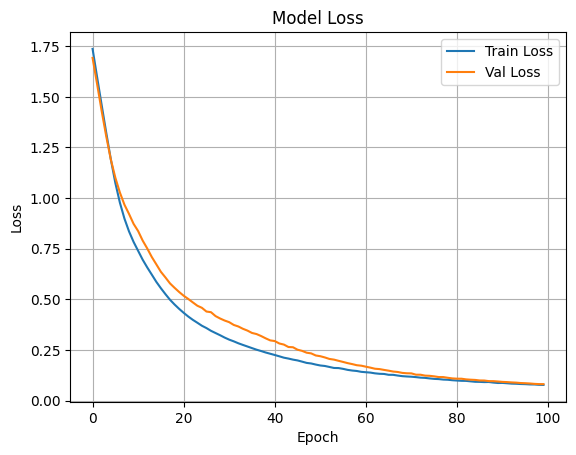

In [38]:
#Plotting training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Predict and compare with true values
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print("\nSample Predictions:")
for i in range(5):
    print(f"True: {true_labels[i]}, Predicted: {pred_labels[i]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Sample Predictions:
True: 4, Predicted: 4
True: 4, Predicted: 4
True: 3, Predicted: 3
True: 5, Predicted: 5
True: 0, Predicted: 0


In [42]:
#For input data
age = float(input("Enter age: "))
weight = float(input("Enter weight (kg): "))
height = float(input("Enter height (ft in): "))
bmi = float(input("Enter BMI: "))

input_data = np.array([[age, weight, height, bmi]])
prediction = model.predict(input_data)
pred_label = np.argmax(prediction, axis=1)[0]  # Get the class index

print(f"Predicted Label: {pred_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 1


MLP only using Numpy

In [44]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("bmi.csv")
X = df[["Age", "Height", "Weight", "Bmi"]].values
Y = df["BmiClass"].values

def one_hot(Y, num_classes):
    one_hot_encoded = np.zeros((len(Y), num_classes))
    one_hot_encoded[np.arange(len(Y)), y] = 1
    return one_hot_encoded

In [69]:
x = bmi_df.drop('target', axis=1)
y = bmi_df['target']
bmi_df.info()

#Prepocessor
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_encoded = one_hot(y, 6)
print(y_encoded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     741 non-null    float64
 1   Height  741 non-null    float64
 2   Weight  741 non-null    float64
 3   Bmi     741 non-null    float64
 4   target  741 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.1 KB
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [60]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Activation functions and derivatives
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [63]:
# Loss function
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

In [99]:
# Network architecture
input_dim = X_train.shape[1]  # 4
hidden1 = 64
hidden2 = 32
hidden3 = 16
output_dim = 6
lr = 0.01
epochs = 200

In [100]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden1) * np.sqrt(2./input_dim)
b1 = np.zeros((1, hidden1))
W2 = np.random.randn(hidden1, hidden2)
b2 = np.zeros((1, hidden2))
W3 = np.random.randn(hidden2, hidden3)
b3 = np.zeros((1, hidden3))
W4 = np.random.randn(hidden3, output_dim)
b4 = np.zeros((1, output_dim))

In [101]:
train_acc_history = []
train_loss_history = []

#Training loop
for epoch in range(epochs):
    #Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = relu(z3)

    z4 = np.dot(a3, W4) + b4
    y_pred = softmax(z4)

    #loss and accuracy
    loss =  cross_entropy(y_train, y_pred)
    acc = accuracy_score(np.argmax(y_train, axis=1), np.argmax(y_pred, axis=1))
    train_acc_history.append(acc)
    train_loss_history.append(loss)
    
    #backward pass
    m = X_train.shape[0]
    dz4 = y_pred - y_train
    dW4 = np.dot(a3.T, dz4) / m #To eradicate the exploding gradients
    db4 = np.sum(dz4, axis=0, keepdims=True) / m

    da3 = np.dot(dz4, W4.T)
    dz3 = da3 * relu_derivative(z3)
    dW3 = np.dot(a2.T, dz3) / m
    db3 = np.sum(dz3, axis=0, keepdims=True) / m

    da2 = np.dot(dz3, W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X_train.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    #update weights
    W4 -= lr * dW4
    b4 -= lr * db4
    W3 -= lr * dW3
    b3 -= lr * db3
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

Epoch 0, Loss: 18.9214, Accuracy: 0.0321
Epoch 10, Loss: 2.3920, Accuracy: 0.7162
Epoch 20, Loss: 1.4199, Accuracy: 0.7889
Epoch 30, Loss: 0.8924, Accuracy: 0.8530
Epoch 40, Loss: 0.6666, Accuracy: 0.8902
Epoch 50, Loss: 0.4975, Accuracy: 0.9003
Epoch 60, Loss: 0.3971, Accuracy: 0.9122
Epoch 70, Loss: 0.3144, Accuracy: 0.9223
Epoch 80, Loss: 0.2622, Accuracy: 0.9341
Epoch 90, Loss: 0.2323, Accuracy: 0.9409
Epoch 100, Loss: 0.2095, Accuracy: 0.9510
Epoch 110, Loss: 0.1908, Accuracy: 0.9561
Epoch 120, Loss: 0.1751, Accuracy: 0.9595
Epoch 130, Loss: 0.1626, Accuracy: 0.9628
Epoch 140, Loss: 0.1526, Accuracy: 0.9645
Epoch 150, Loss: 0.1444, Accuracy: 0.9662
Epoch 160, Loss: 0.1374, Accuracy: 0.9662
Epoch 170, Loss: 0.1312, Accuracy: 0.9679
Epoch 180, Loss: 0.1257, Accuracy: 0.9679
Epoch 190, Loss: 0.1206, Accuracy: 0.9679


In [102]:
# Evaluate on test data
z1 = np.dot(X_test, W1) + b1
a1 = relu(z1)
z2 = np.dot(a1, W2) + b2
a2 = relu(z2)
z3 = np.dot(a2, W3) + b3
a3 = relu(z3)
z4 = np.dot(a3, W4) + b4
y_test_pred = softmax(z4)

test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_test_pred, axis=1))
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 92.62%


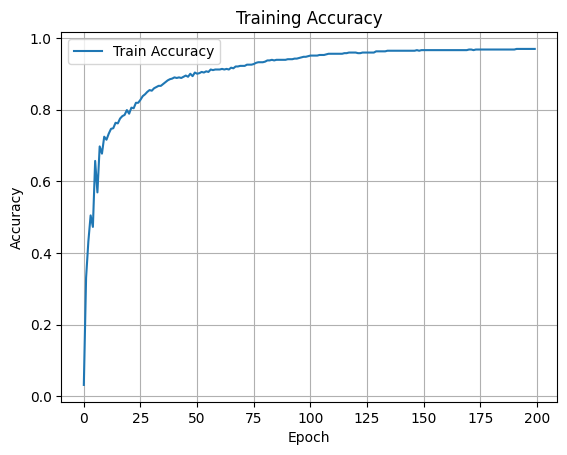

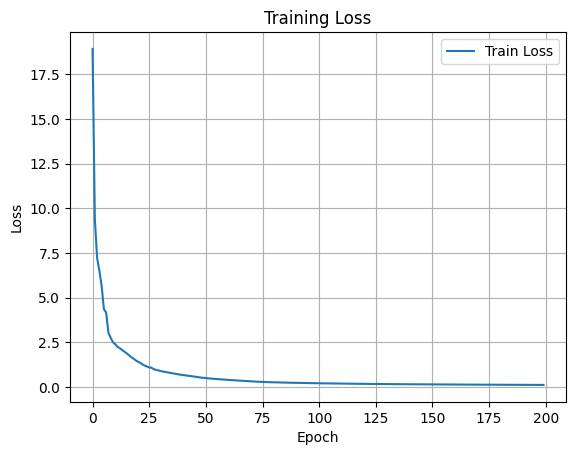


Sample Predictions:
True: 4, Predicted: 4
True: 4, Predicted: 4
True: 3, Predicted: 3
True: 5, Predicted: 5
True: 0, Predicted: 0
True: 3, Predicted: 3
True: 4, Predicted: 4
True: 3, Predicted: 3


In [104]:
# Plotting
plt.plot(train_acc_history, label='Train Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

plt.plot(train_loss_history, label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# Sample predictions
print("\nSample Predictions:")
for i in range(8):
    print(f"True: {np.argmax(y_test[i])}, Predicted: {np.argmax(y_test_pred[i])}")

Demonstrating the difference in decision boundary between the perceptron and a Bayes classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [2]:
#A lineary separable Gaussian dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=1.5, random_state=42)

#train perceptrona nd Bayes classifier
perceptron = Perceptron(max_iter=1000, tol=1e-3)
bayes = GaussianNB()

perceptron.fit(X, y)
bayes.fit(X, y)

,priors,None
,var_smoothing,1e-09


In [3]:
#Create a mesh grid for plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min,y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max,300))
grid = np.c_[xx.ravel(), yy.ravel()]

In [6]:
#Predict and reshape results
Z_perceptron = perceptron.predict(grid).reshape(xx.shape)
Z_bayes = bayes.predict(grid).reshape(xx.shape)

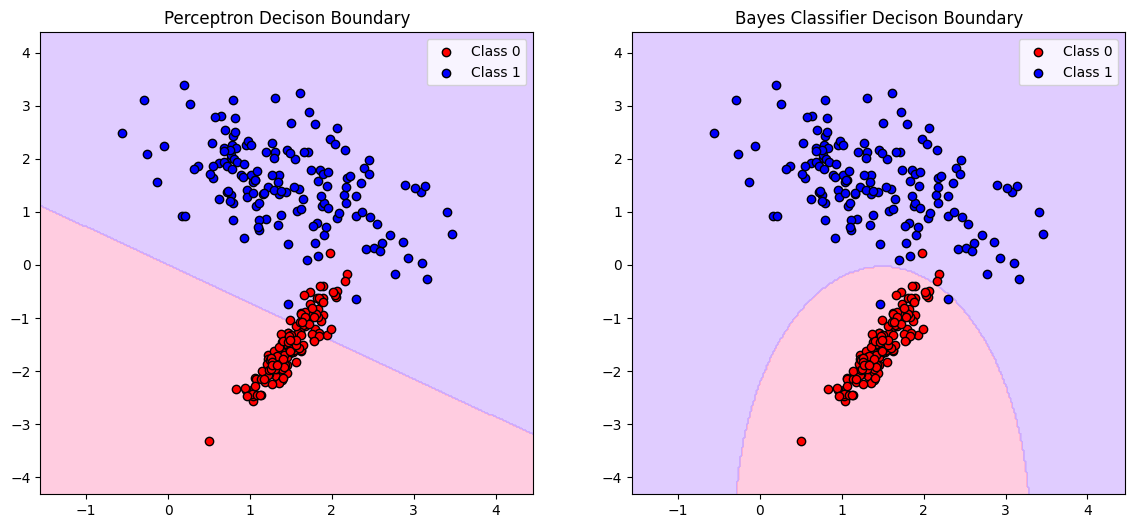

In [7]:
#Plot decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
cmap_bg = ListedColormap(['#FFAACC', '#CCAAFF'])
cmap_pts = ['red', 'blue']

#perceptron plot
ax1.contourf(xx, yy, Z_perceptron, cmap=cmap_bg, alpha=0.6)
for i, color in enumerate(cmap_pts):
    ax1.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, edgecolor='k', label=f"Class {i}")
ax1.set_title("Perceptron Decison Boundary")
ax1.legend()

#Bayes classifier plot
ax2.contourf(xx, yy, Z_bayes, cmap=cmap_bg, alpha=0.6)
for i, color in enumerate(cmap_pts):
    ax2.scatter(X[y == i][:, 0], X[y == i][:, 1], color=color, edgecolor='k', label=f"Class {i}")
ax2.set_title("Bayes Classifier Decison Boundary")
ax2.legend()

plt.show()

The geometric effect of a misclassification correction on the weight vector in the perceptron.

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jneec\AppData\Local\Temp\ipykernel_3484\4242135278.py:23: SyntaxWarning: invalid escape sequence '\c'
  plt.quiver(0, 0, y * x[0], y * x[1], angles='xy', scale_units='xy', scale=1, color='red', label='Misclassifies  $y \cdot x$')


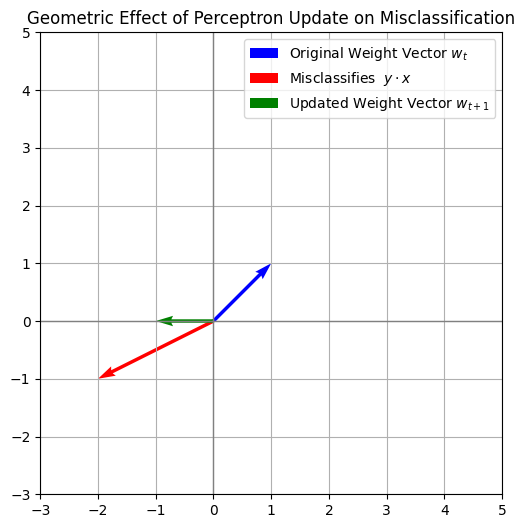

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Misclassified data points (xi, yi)
x = np.array([2, 1])
y = -1 #true label

#Initial weight vector
w = np.array([1, 1])

#Weight update rule
w_new = w + y * x

#Plotting
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

#Plot original weight vector
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Weight Vector $w_t$')

#Plot misclassified point (Scaled for visualization)
plt.quiver(0, 0, y * x[0], y * x[1], angles='xy', scale_units='xy', scale=1, color='red', label='Misclassifies  $y \cdot x$')

#Plot updated-weight vector
plt.quiver(0, 0, w_new[0], w_new[1], angles='xy', scale_units='xy', scale=1, color='green', label='Updated Weight Vector $w_{t+1}$')

plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Geometric Effect of Perceptron Update on Misclassification")
plt.legend()
plt.show()